In [ ]:
pip install numpy pandas matplotlib seaborn tensorflow scikit-learn


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

**Load Datasets**

In [ ]:

import pandas as pd
data = pd.read_csv('/content/iphone.csv')

# Display the first few rows
print(data.head())

# Check for null values
print(data.isnull().sum())


  productAsin country        date  isVerified  ratingScore  \
0  B09G9BL5CP   India  11-08-2024        True            4   
1  B09G9BL5CP   India  16-08-2024        True            5   
2  B09G9BL5CP   India  14-05-2024        True            4   
3  B09G9BL5CP   India  24-06-2024        True            5   
4  B09G9BL5CP   India  18-05-2024        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/

In [ ]:
data.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


**PreProcess The Dataset**

In [ ]:

import numpy as np
data = data[['reviewDescription', 'ratingScore']]

# Drop rows with missing reviews or ratings
data.dropna(subset=['reviewDescription', 'ratingScore'], inplace=True)

# Define a function to map ratings to sentiment labels
def map_sentiment(rating):
    if rating <= 2:
        return 0  # Negative sentiment
    elif rating >= 4:
        return 1  # Positive sentiment
    else:
        return np.nan  # Neutral sentiment (discard these)

# Apply the function to create a sentiment column
data['sentiment'] = data['ratingScore'].apply(map_sentiment)

# Drop rows with neutral sentiment
data.dropna(subset=['sentiment'], inplace=True)

# Display the first few rows
print(data.head())


                                   reviewDescription  ratingScore  sentiment
0  Every thing is good about iPhones, there's not...            4        1.0
1  It look so fabulous, I am android user switche...            5        1.0
2  I tried to flip camera while recording but no ...            4        1.0
3                                       100% genuine            5        1.0
4         Happy to get the iPhone 13 in Amazon offer            5        1.0


In [ ]:
data.head()

,reviewDescription,ratingScore,sentiment
0,"Every thing is good about iPhones, there's not...",4,1.0
1,"It look so fabulous, I am android user switche...",5,1.0
2,I tried to flip camera while recording but no ...,4,1.0
3,100% genuine,5,1.0
4,Happy to get the iPhone 13 in Amazon offer,5,1.0


**Tokenization and ZeroPadding**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Set parameters
max_words = 10000  # Maximum number of unique words
max_len = 150  # Maximum review length (in words)

# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['reviewDescription'])

# Convert texts to sequences
X = tokenizer.texts_to_sequences(data['reviewDescription'])

# Pad sequences to ensure uniform input size
X = pad_sequences(X, maxlen=max_len)

# Labels (sentiment)
y = data['sentiment'].values


**Split The Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Build and Train the Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(SimpleRNN(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.6402 - loss: 0.6344 - val_accuracy: 0.7472 - val_loss: 0.5399
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.7822 - loss: 0.4899 - val_accuracy: 0.7563 - val_loss: 0.5119
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9041 - loss: 0.2857 - val_accuracy: 0.7540 - val_loss: 0.5050
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9325 - loss: 0.2094 - val_accuracy: 0.7654 - val_loss: 0.5029
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9694 - loss: 0.1316 - val_accuracy: 0.7699 - val_loss: 0.5069
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9756 - loss: 0.0871 - val_accuracy: 0.7722 - val_loss: 0.5326
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9880 - loss: 0.0535 - val_accuracy: 0.7472 - val_loss: 0.5571
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.9878 - loss: 0.0487 - val_accuracy: 0.

**Evaluation Of the Model**

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7215 - loss: 0.7153
Test Accuracy: 0.7468


**Visualisation Of Model Training**

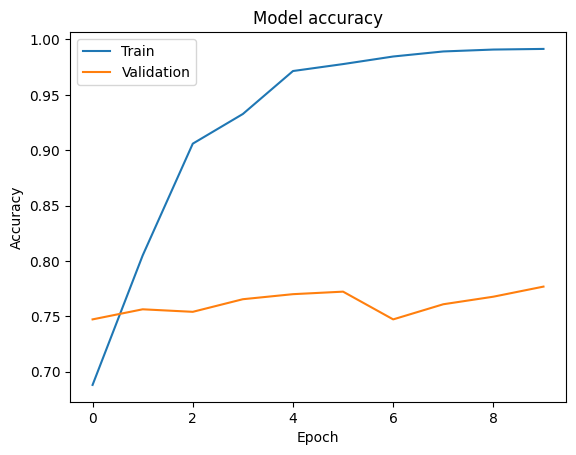

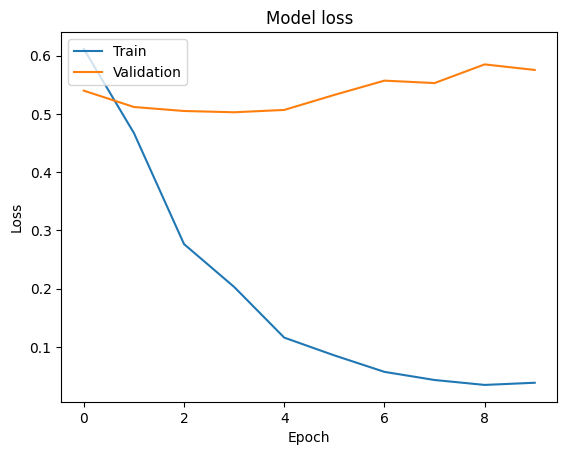

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Prediction Check**

In [ ]:
# Function to predict sentiment
def predict_sentiment(review):
    review = review.lower()  # Lowercase for consistency
    review_seq = tokenizer.texts_to_sequences([review])
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    prediction = model.predict(review_pad)
    return "Positive" if prediction[0][0] > 0.5 else "Negative"

# Test the function
print(predict_sentiment("This iPhone is amazing! The camera quality is fantastic."))
print(predict_sentiment("I hate the battery life of this phone, it doesn't last."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Negative
